<a href="https://colab.research.google.com/github/DMNDKDasanayaka/Price-Prediction-Model/blob/main/PricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dendencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Read Dataset

In [3]:
df=pd.read_csv("carrot.csv")

In [4]:
df.head()

,Date,Carrot_Price_Min,Carrot_Price_Max,Avg_Price,Fuel_Price,Rainfall_Badulla,Rainfall_Nuwara Eliya,Rainfall_Kandy,Rainfall_Matale,Avg_Rainfall,Temperature_Badulla,Temperature_Nuwara Eliya,Temperature_Kandy,Temperature_Matale,Avg_Temperature
0,2016.01.01,150,200.0,175.0,109,30.484,20.579,1.497,3.213,13.94325,20.4,18.2,22.0,24.5,21.275
1,2016.01.02,84,99.0,91.5,109,5.300,1.801,0.345,0.607,2.01325,20.1,17.9,21.7,23.8,20.875
2,2016.01.03,180,220.0,200.0,109,0.199,0.000,0.025,0.948,0.29300,21.0,18.7,22.9,25.0,21.900
3,2016.01.04,150,200.0,175.0,109,0.209,0.300,0.004,0.020,0.13325,21.2,18.9,23.1,25.4,22.150
4,2016.01.05,150,170.0,160.0,109,0.070,0.100,0.001,0.323,0.12350,21.6,19.3,23.2,25.4,22.375


In [5]:
df.tail()

,Date,Carrot_Price_Min,Carrot_Price_Max,Avg_Price,Fuel_Price,Rainfall_Badulla,Rainfall_Nuwara Eliya,Rainfall_Kandy,Rainfall_Matale,Avg_Rainfall,Temperature_Badulla,Temperature_Nuwara Eliya,Temperature_Kandy,Temperature_Matale,Avg_Temperature
3648,2025.12.27,200,230.0,215.0,277,0.1,0.4,0.1,0.1,0.175,18.1,16.4,19.5,22.9,19.225
3649,2025.12.28,220,230.0,225.0,277,1.9,1.3,1.2,0.4,1.200,19.2,17.3,20.2,22.9,19.900
3650,2025.12.29,180,220.0,200.0,277,1.9,1.1,1.1,0.1,1.050,19.9,18.0,20.8,23.3,20.500
3651,2025.12.30,180,200.0,190.0,277,1.9,2.1,2.4,0.7,1.775,20.5,18.5,21.4,24.2,21.150
3652,2025.12.31,312,346.0,329.0,277,5.3,4.2,7.0,2.9,4.850,20.6,18.7,21.4,23.8,21.125


Sanity check of data

In [6]:
df.shape

(3653, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3653 non-null   object 
 1   Carrot_Price_Min          3653 non-null   int64  
 2   Carrot_Price_Max          3551 non-null   float64
 3   Avg_Price                 3653 non-null   float64
 4   Fuel_Price                3653 non-null   int64  
 5   Rainfall_Badulla          3653 non-null   float64
 6   Rainfall_Nuwara Eliya     3653 non-null   float64
 7   Rainfall_Kandy            3653 non-null   float64
 8   Rainfall_Matale           3653 non-null   float64
 9   Avg_Rainfall              3653 non-null   float64
 10  Temperature_Badulla       3653 non-null   float64
 11  Temperature_Nuwara Eliya  3653 non-null   float64
 12  Temperature_Kandy         3653 non-null   float64
 13  Temperature_Matale        3653 non-null   float64
 14  Avg_Temp

In [11]:
df.isnull().sum()

,0
Date,0
Carrot_Price_Min,0
Carrot_Price_Max,102
Avg_Price,0
Fuel_Price,0
Rainfall_Badulla,0
Rainfall_Nuwara Eliya,0
Rainfall_Kandy,0
Rainfall_Matale,0
Avg_Rainfall,0


In [12]:
df.isnull().sum()/df.shape[0]*100

,0
Date,0.000000
Carrot_Price_Min,0.000000
Carrot_Price_Max,2.792226
Avg_Price,0.000000
Fuel_Price,0.000000
Rainfall_Badulla,0.000000
Rainfall_Nuwara Eliya,0.000000
Rainfall_Kandy,0.000000
Rainfall_Matale,0.000000
Avg_Rainfall,0.000000


In [13]:
#find duplicate
df.duplicated().sum()

np.int64(0)

In [16]:
#find garbage value
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Date
2025.12.31    1
2016.01.01    1
2016.01.02    1
2016.01.03    1
2016.01.04    1
             ..
2016.01.10    1
2016.01.09    1
2016.01.08    1
2016.01.07    1
2016.01.06    1
Name: count, Length: 3653, dtype: int64
******************************


Exploratory Data Analysis(EDA)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carrot_Price_Min,3653.0,150.909937,117.644792,15.000,75.00000,100.00000,210.000,1300.000
Carrot_Price_Max,3551.0,174.815263,135.334285,5.000,94.00000,122.00000,240.000,1800.000
Avg_Price,3653.0,162.390912,125.510087,20.000,82.50000,110.00000,225.000,1500.000
Fuel_Price,3653.0,192.896523,114.070311,99.000,106.00000,109.00000,289.000,460.000
Rainfall_Badulla,3653.0,5.979689,13.045103,0.000,0.03100,0.79800,5.491,207.381
Rainfall_Nuwara Eliya,3653.0,5.317302,11.375023,0.000,0.01200,0.80100,5.049,164.300
Rainfall_Kandy,3653.0,5.197876,12.043636,0.000,0.02700,0.48300,4.537,209.000
Rainfall_Matale,3653.0,5.508342,11.802538,0.000,0.10200,1.01100,5.257,184.800
Avg_Rainfall,3653.0,5.500802,10.172663,0.000,0.25575,1.38975,6.328,167.325
Temperature_Badulla,3653.0,22.571120,1.760502,17.400,21.30000,22.50000,23.900,27.600


In [21]:
df.describe(include="object")

,Date
count,3653
unique,3653
top,2025.12.31
freq,1


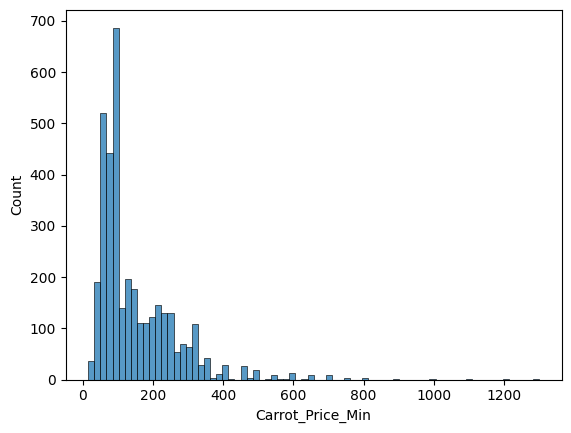

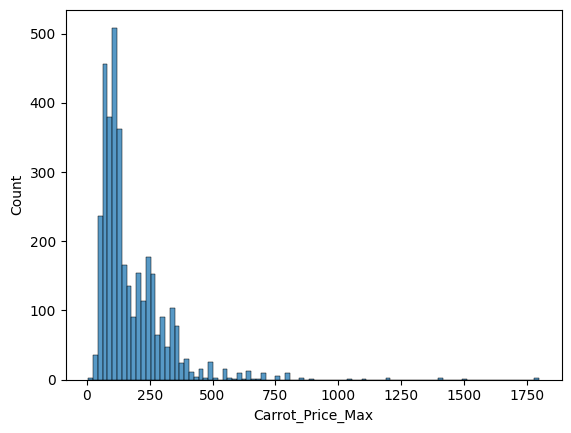

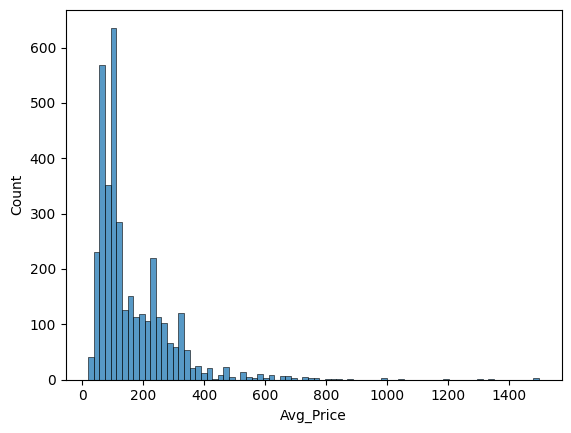

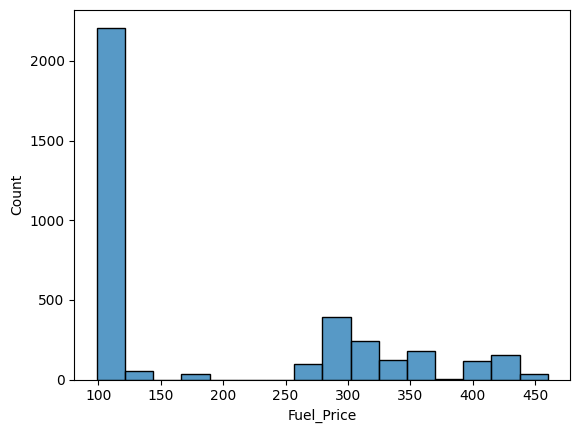

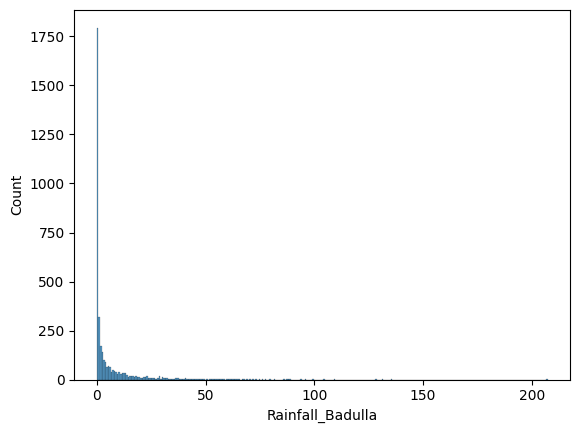

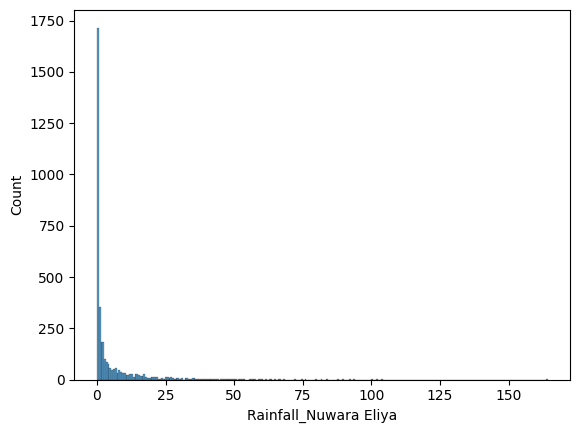

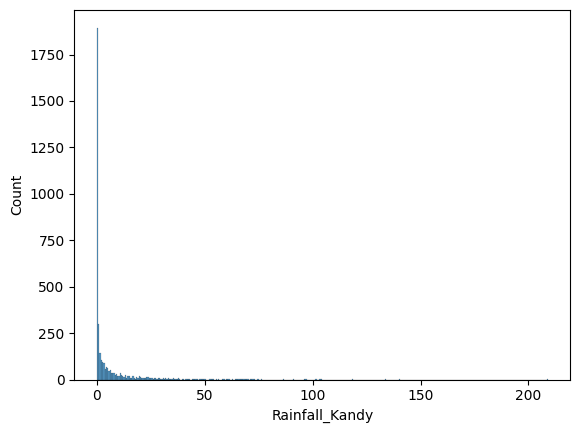

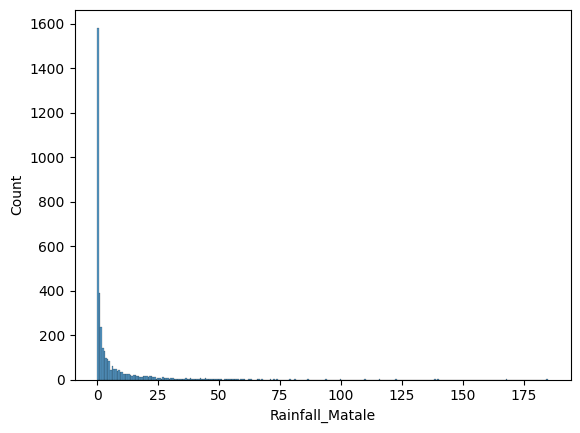

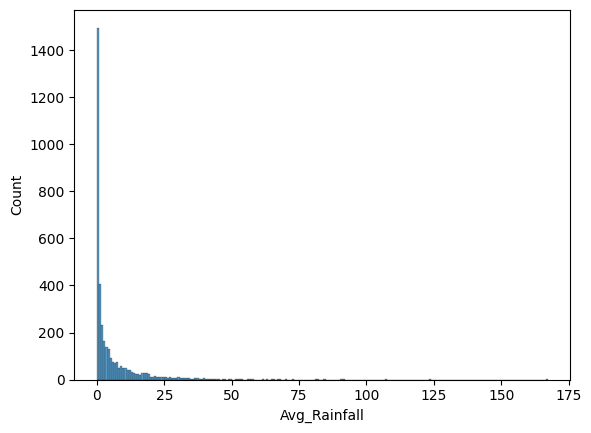

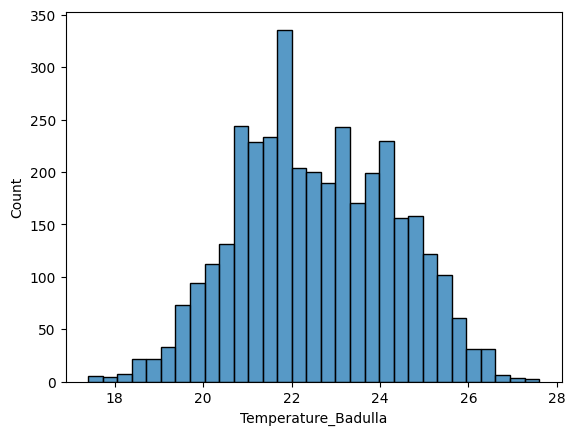

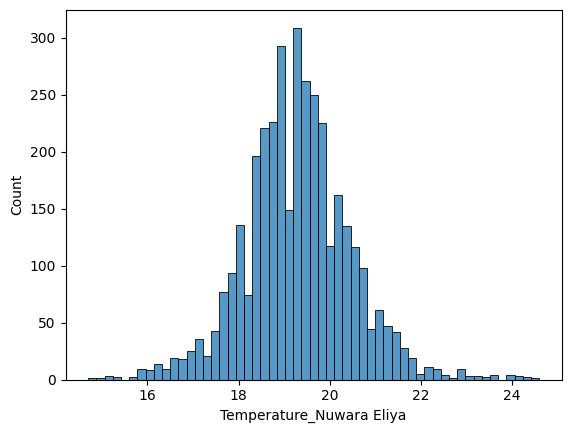

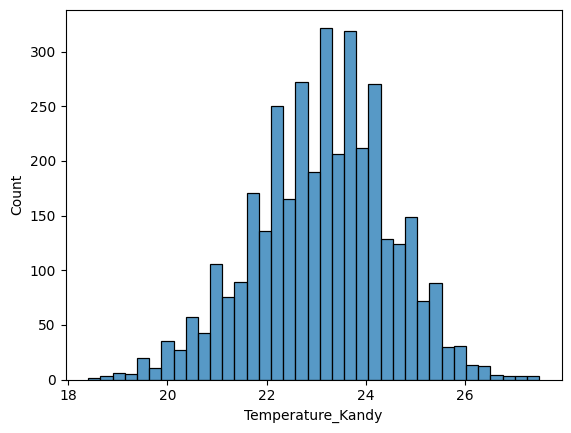

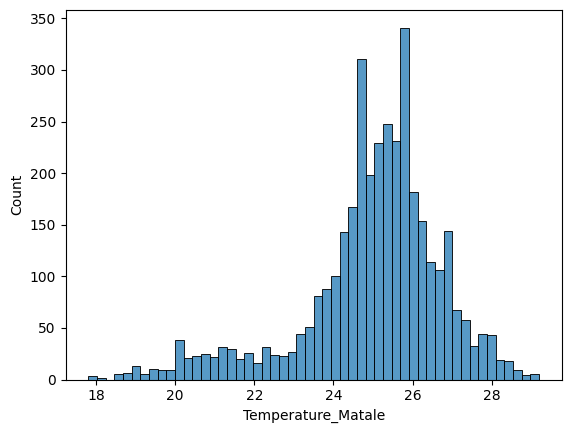

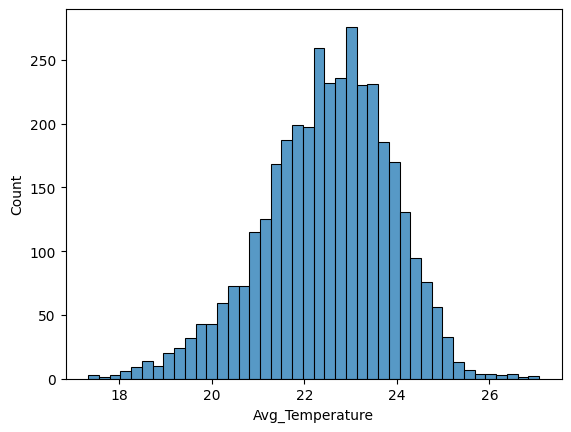

In [23]:
#histrogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

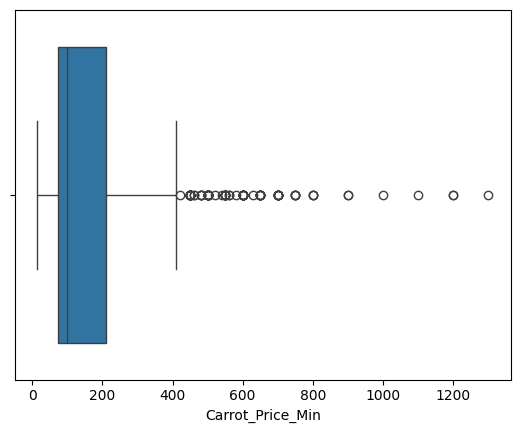

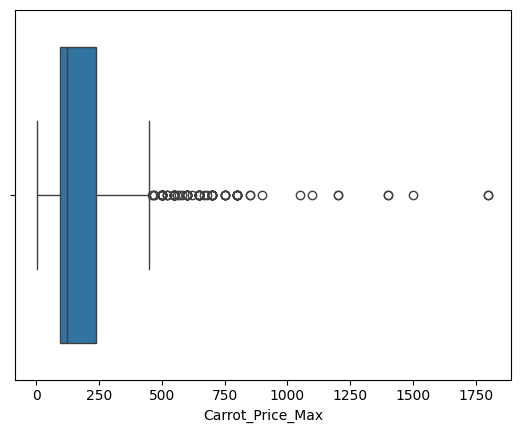

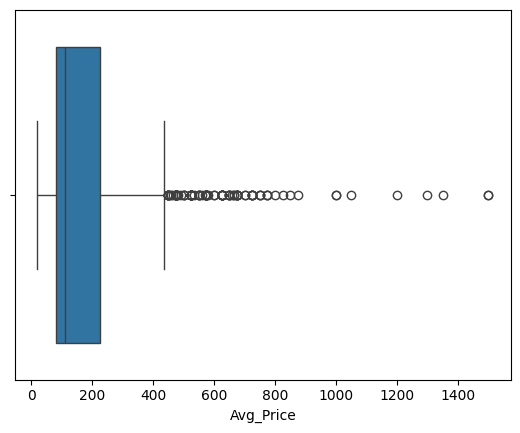

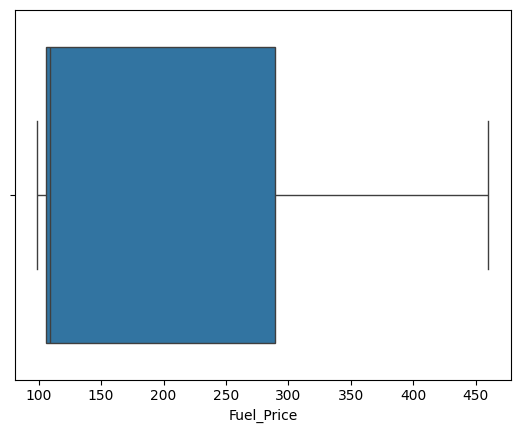

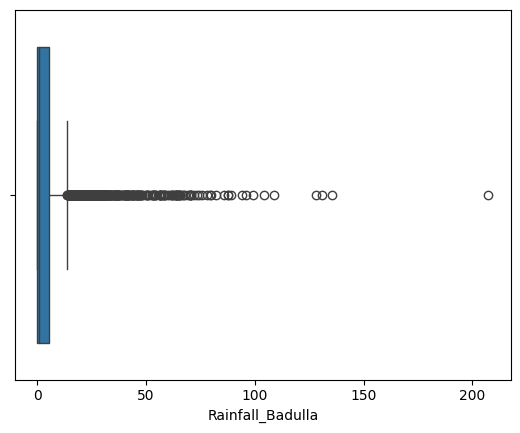

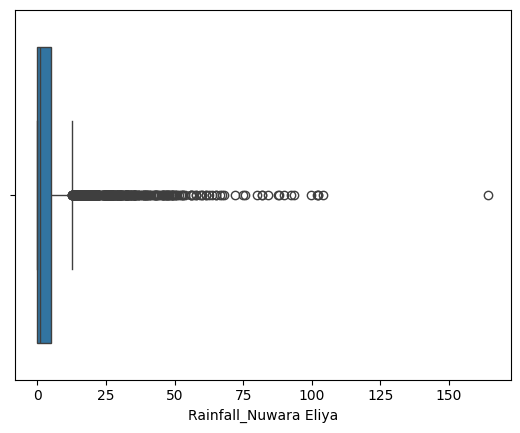

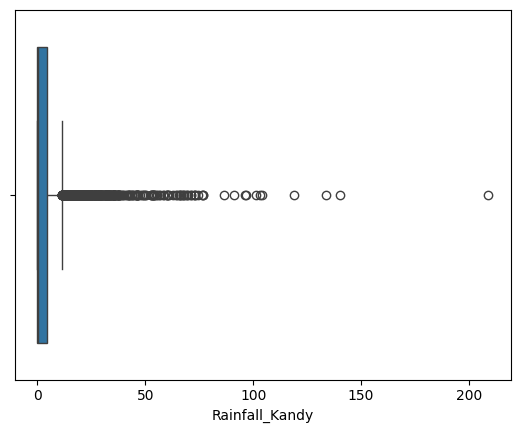

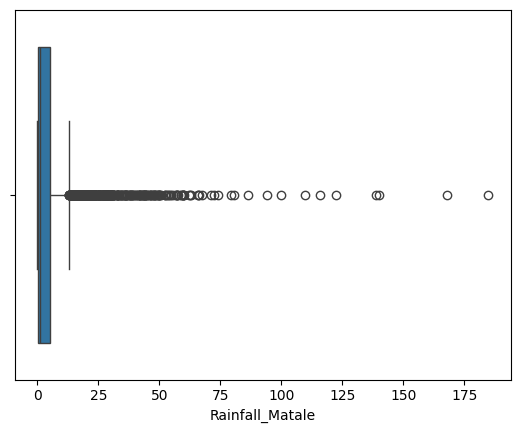

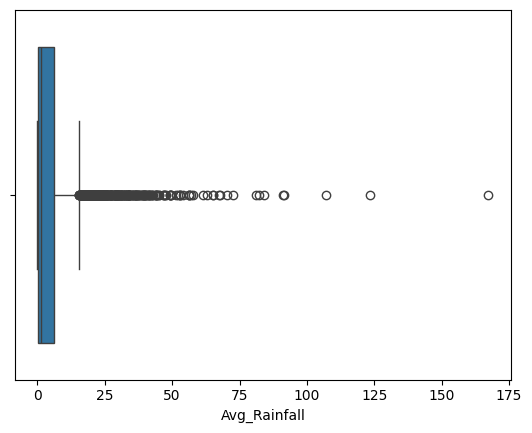

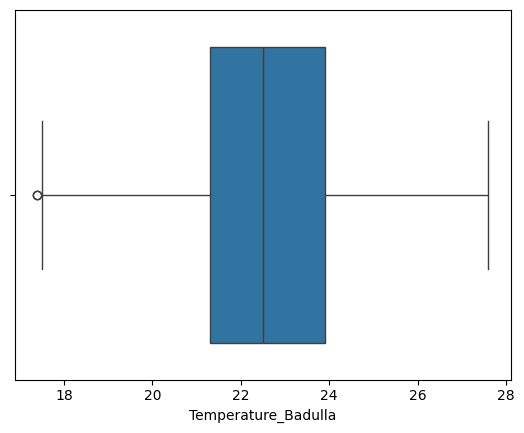

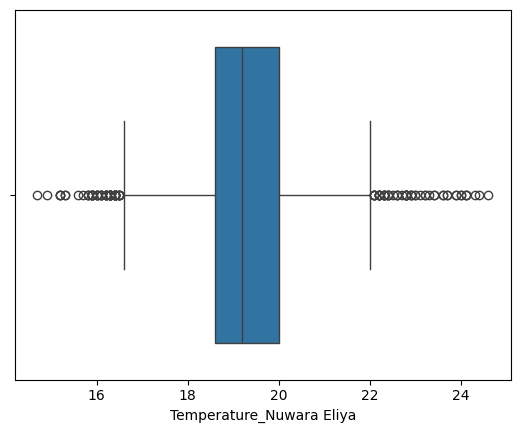

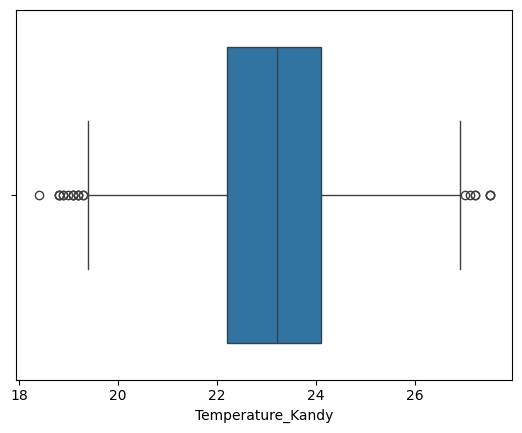

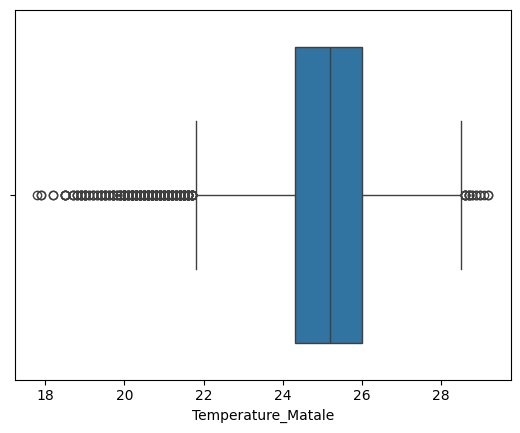

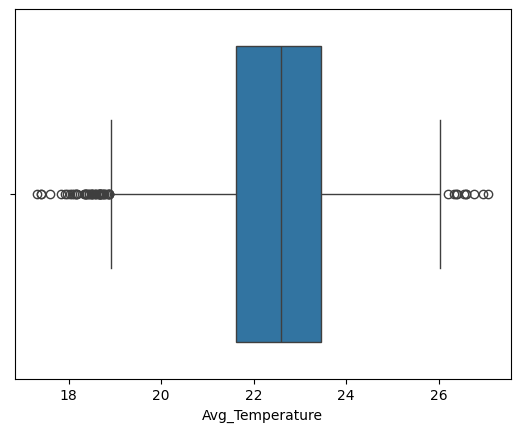

In [24]:
#Boxplot-to-identify Outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

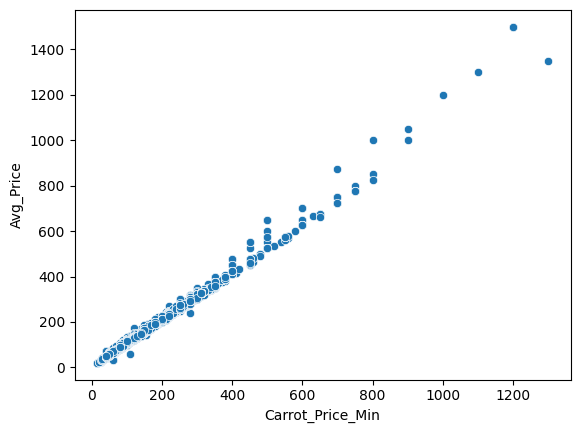

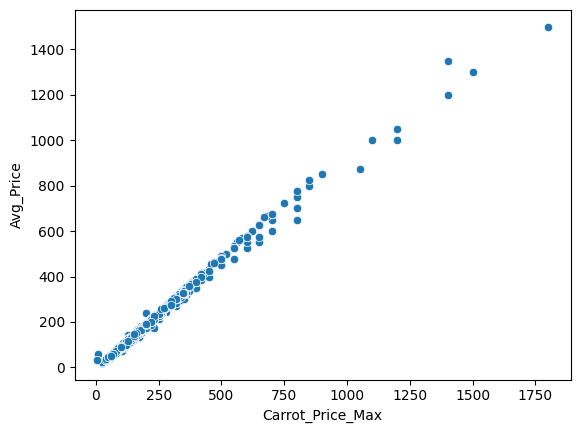

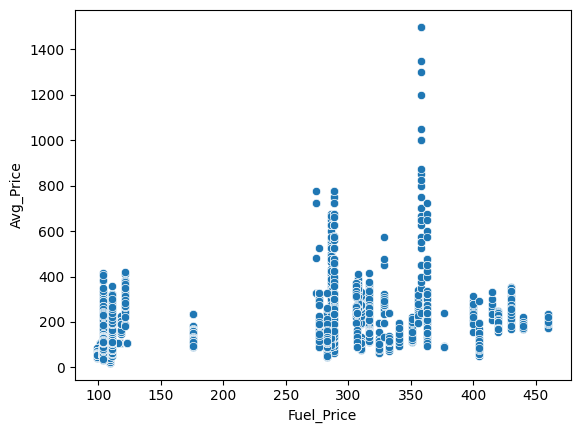

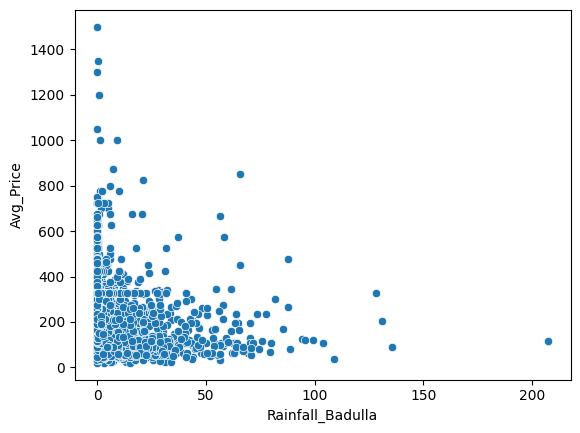

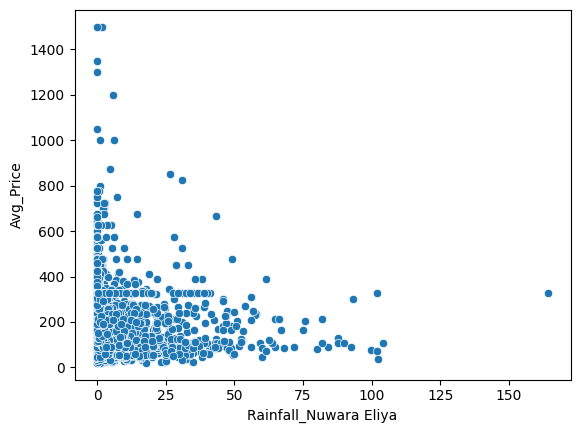

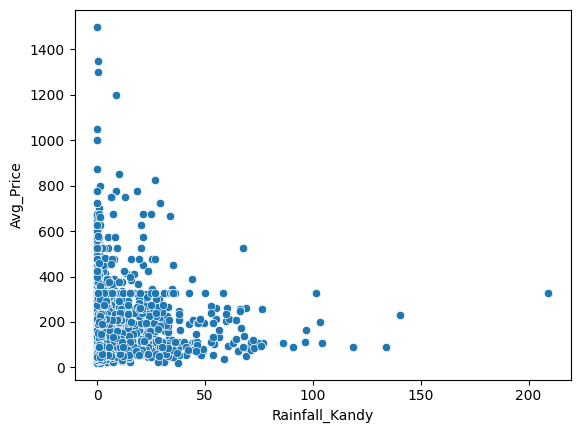

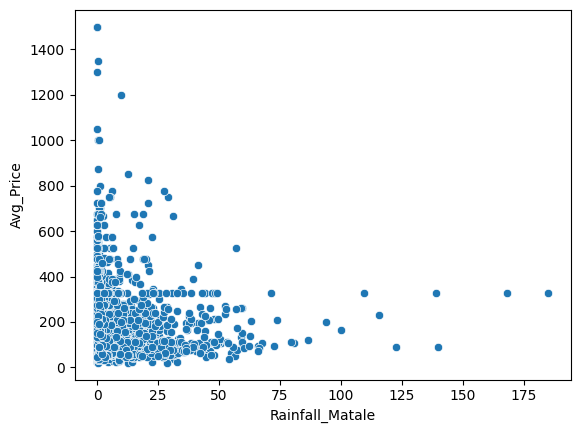

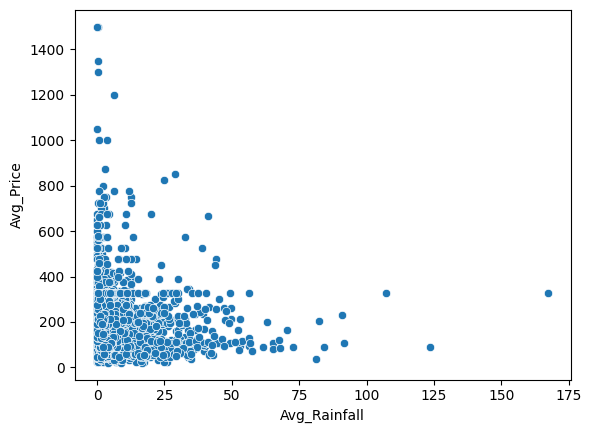

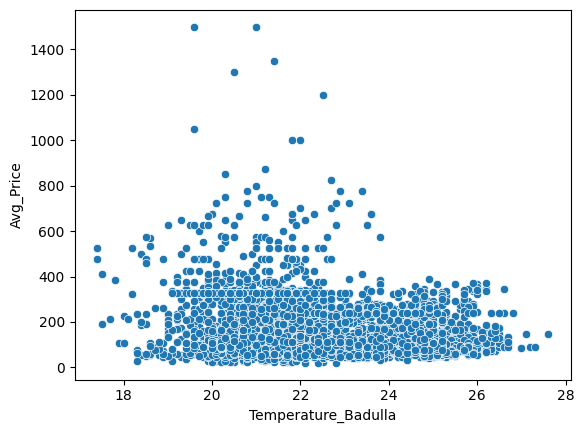

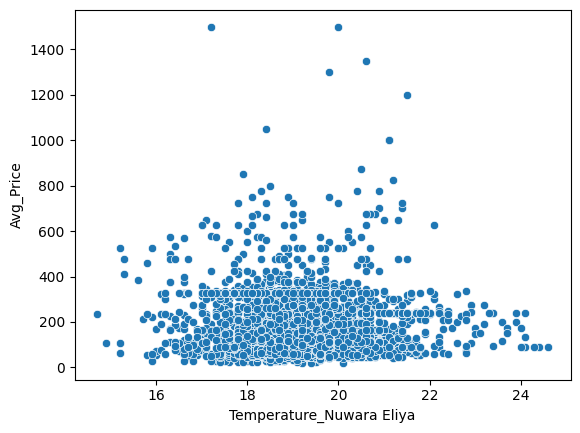

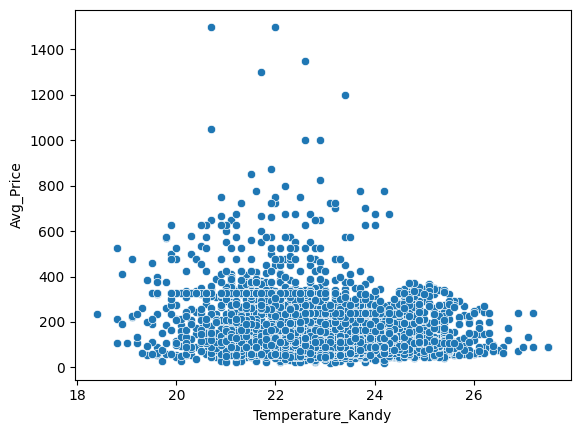

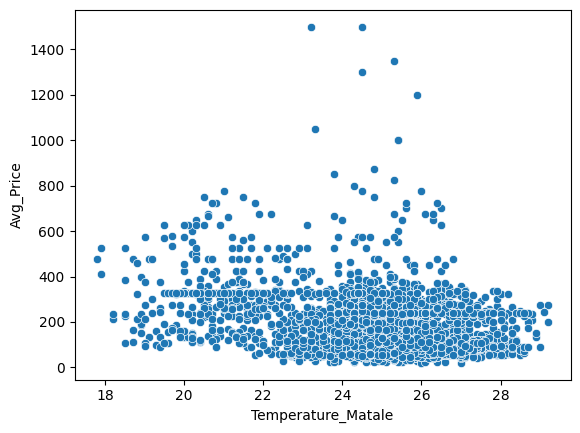

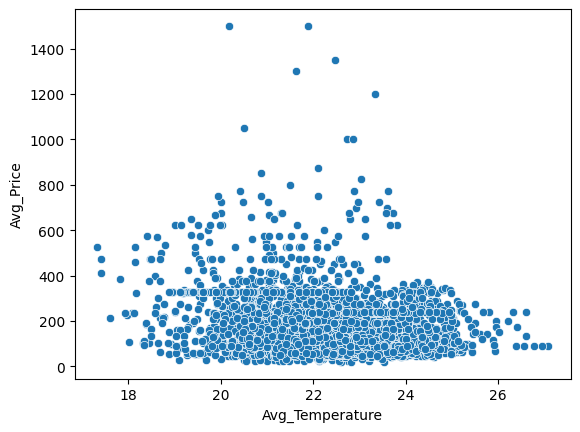

In [28]:
#scatterplot to understand the relationship
for i in ['Carrot_Price_Min', 'Carrot_Price_Max', 'Fuel_Price',
       'Rainfall_Badulla', 'Rainfall_Nuwara Eliya', 'Rainfall_Kandy',
       'Rainfall_Matale', 'Avg_Rainfall', 'Temperature_Badulla',
       'Temperature_Nuwara Eliya', 'Temperature_Kandy', 'Temperature_Matale',
       'Avg_Temperature']:
       sns.scatterplot(data=df,x=i,y='Avg_Price')
       plt.show()

In [26]:
df.select_dtypes(include="number").columns

Index(['Carrot_Price_Min', 'Carrot_Price_Max', 'Avg_Price', 'Fuel_Price',
       'Rainfall_Badulla', 'Rainfall_Nuwara Eliya', 'Rainfall_Kandy',
       'Rainfall_Matale', 'Avg_Rainfall', 'Temperature_Badulla',
       'Temperature_Nuwara Eliya', 'Temperature_Kandy', 'Temperature_Matale',
       'Avg_Temperature'],
      dtype='object')

In [30]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

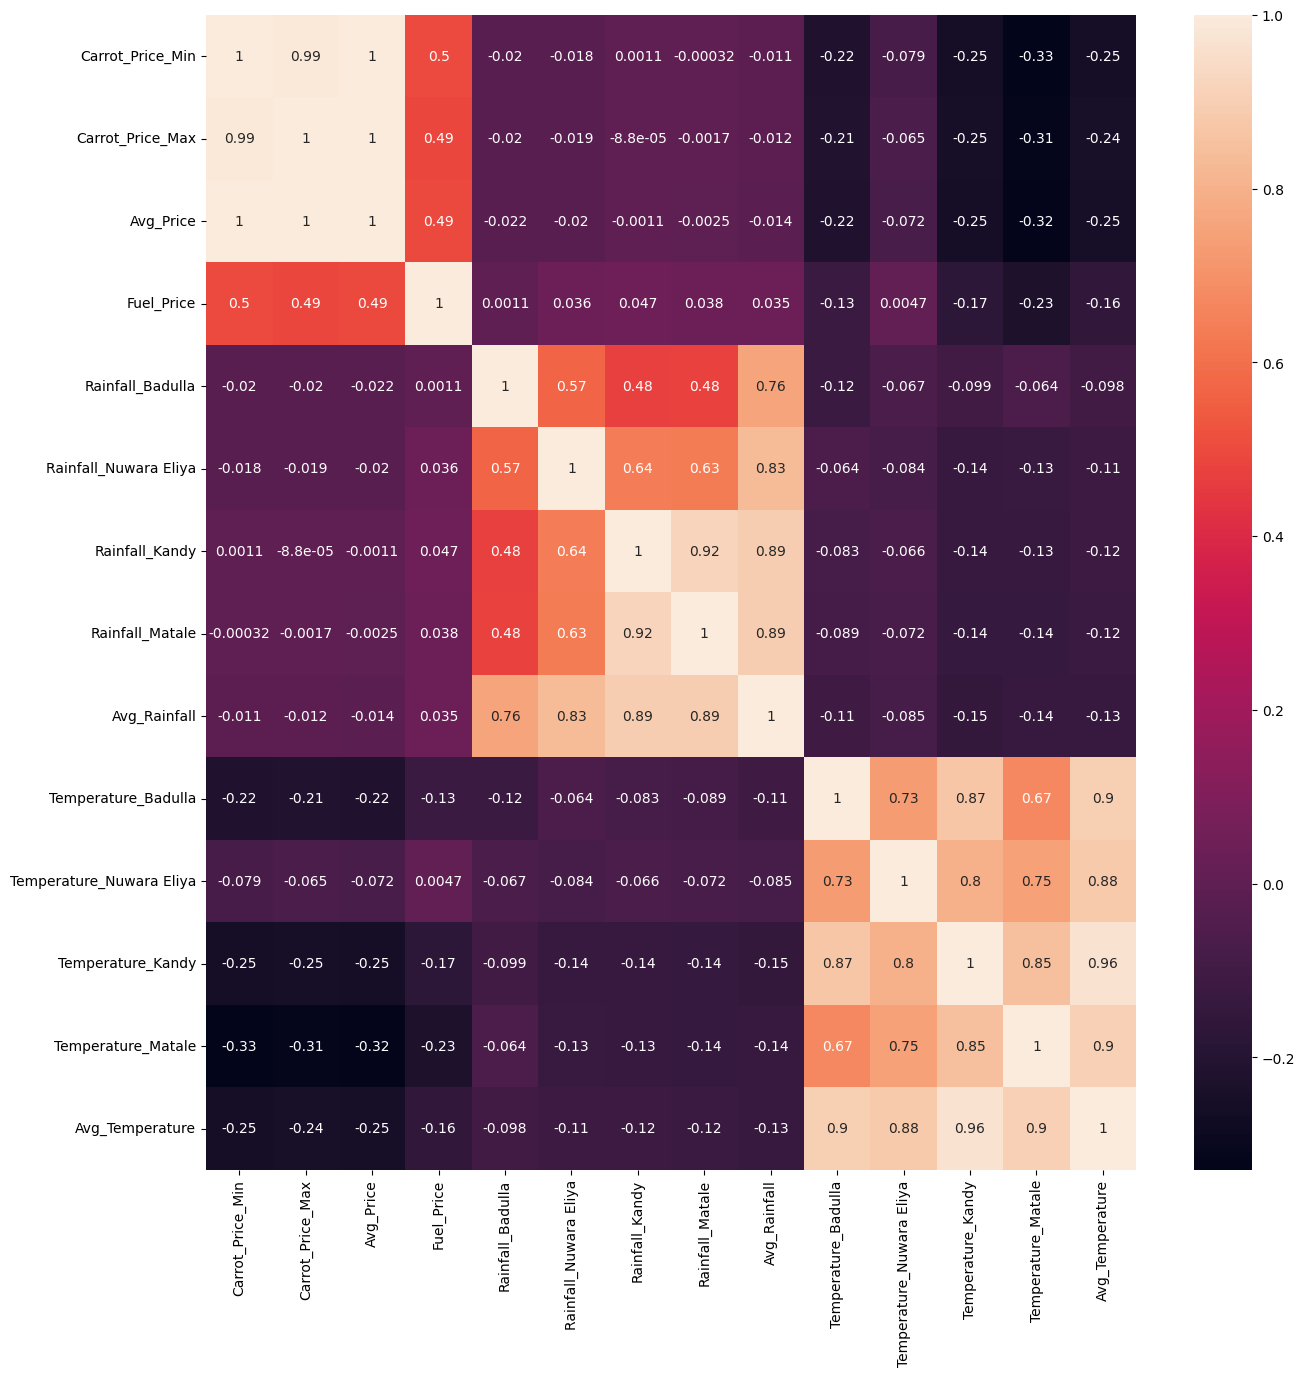

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

Missing Value treatments

In [36]:
for i in ["Carrot_Price_Max"]:
  df[i].fillna(df[i].median(),inplace=True)

/tmp/ipython-input-1156770937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)


In [37]:
df.isnull().sum()

,0
Date,0
Carrot_Price_Min,0
Carrot_Price_Max,0
Avg_Price,0
Fuel_Price,0
Rainfall_Badulla,0
Rainfall_Nuwara Eliya,0
Rainfall_Kandy,0
Rainfall_Matale,0
Avg_Rainfall,0


Outliers treatments

In [39]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [44]:
wisker(df["Avg_Price"])

(np.float64(-131.25), np.float64(438.75))

In [45]:
for i in['Avg_Price','Avg_Temperature','Avg_Rainfall']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

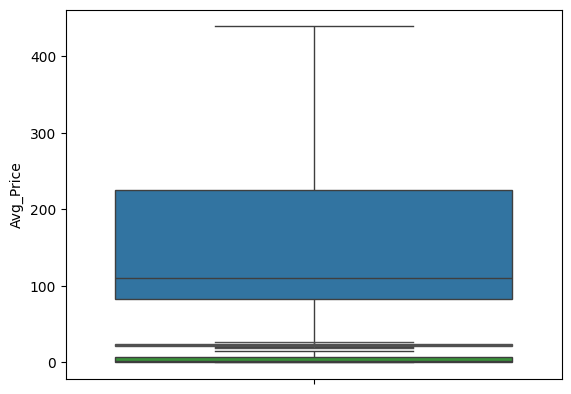

In [47]:
for i in['Avg_Price','Avg_Temperature','Avg_Rainfall']:
  sns.boxplot(df[i])
  plt.show

In [42]:
df.columns

Index(['Date', 'Carrot_Price_Min', 'Carrot_Price_Max', 'Avg_Price',
       'Fuel_Price', 'Rainfall_Badulla', 'Rainfall_Nuwara Eliya',
       'Rainfall_Kandy', 'Rainfall_Matale', 'Avg_Rainfall',
       'Temperature_Badulla', 'Temperature_Nuwara Eliya', 'Temperature_Kandy',
       'Temperature_Matale', 'Avg_Temperature'],
      dtype='object')

**Rest of the part**

In [55]:
df.rename({'Avg_Price':'Carrot_Price'},axis=1, inplace=True)

In [56]:
df.drop(columns=['Carrot_Price_Min','Carrot_Price_Max','Rainfall_Badulla', 'Rainfall_Nuwara Eliya',
       'Rainfall_Kandy', 'Rainfall_Matale','Temperature_Badulla', 'Temperature_Nuwara Eliya', 'Temperature_Kandy',
       'Temperature_Matale',])

,Date,Carrot_Price,Fuel_Price,Avg_Rainfall,Avg_Temperature
0,2016.01.01,175.0,109,13.94325,21.275
1,2016.01.02,91.5,109,2.01325,20.875
2,2016.01.03,200.0,109,0.29300,21.900
3,2016.01.04,175.0,109,0.13325,22.150
4,2016.01.05,160.0,109,0.12350,22.375
...,...,...,...,...,...
3648,2025.12.27,215.0,277,0.17500,19.225
3649,2025.12.28,225.0,277,1.20000,19.900
3650,2025.12.29,200.0,277,1.05000,20.500
3651,2025.12.30,190.0,277,1.77500,21.150


In [57]:
df.dtypes

,0
Date,object
Carrot_Price_Min,int64
Carrot_Price_Max,float64
Carrot_Price,float64
Fuel_Price,int64
Rainfall_Badulla,float64
Rainfall_Nuwara Eliya,float64
Rainfall_Kandy,float64
Rainfall_Matale,float64
Avg_Rainfall,float64


In [62]:
df=df.astype({'Carrot_Price':'int'})
df.dtypes

,0
Date,object
Carrot_Price_Min,int64
Carrot_Price_Max,float64
Carrot_Price,int64
Fuel_Price,int64
Rainfall_Badulla,float64
Rainfall_Nuwara Eliya,float64
Rainfall_Kandy,float64
Rainfall_Matale,float64
Avg_Rainfall,float64
